In [1]:
import sys  ###fastslam1（下まで全部）
sys.path.append('../scripts/')
from mcl import *
from kf import *   #誤差楕円を描くのに利用

<IPython.core.display.Javascript object>


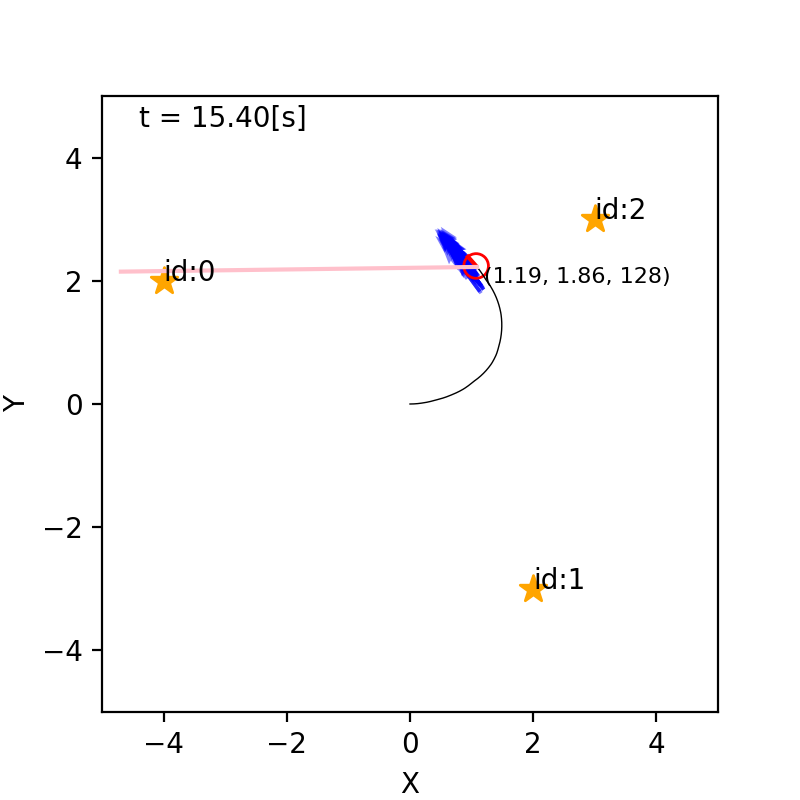

In [2]:
if __name__ == '__main__': 
    time_interval = 0.1
    world = World(30, time_interval) 

    ###真の地図を作成###
    m = Map()
    landmark_positions = [(-4,2), (2,-3), (3,3)]
    for p in landmark_positions:
        m.append_landmark(Landmark(*p))
        
    world.append(m) 

    ### ロボットを作る ###
    initial_pose = np.array([0, 0, 0]).T
    pf = Mcl(m, initial_pose, 100)
    circling = MclAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(initial_pose, sensor=Camera(m), agent=circling, color="red")
    world.append(r)

    world.draw()